# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data_df = pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how= 'outer')

# Display the data table for preview
full_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [16]:
# Checking the number of mice.
unique_count = len(pd.unique(full_data_df['Mouse ID']))
print(str(unique_count) + ' total mice observed in study.')

249 total mice observed in study.


In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    # Source method [1]

duplicates_df = full_data_df.loc[full_data_df.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique
print(duplicates_df)

<bound method Series.unique of 861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object>


In [18]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_df

<bound method Series.unique of 861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object>

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # method source [2]: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
cleaned_fulldata_df = full_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep= False)
cleaned_fulldata_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice in the clean DataFrame.
    # same method as unique_count above:

unique_cleaned = len(pd.unique(cleaned_fulldata_df['Mouse ID']))
print(str(unique_count) + ' unique mice in study.')

249 unique mice in study.


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # Source code [3]: Aggregate per column
summary_df = cleaned_fulldata_df.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
                                                                     }).rename(columns= {'mean': 'Mean Tumor Volume',
                                                                                        'median': 'Median Tumor Volume',
                                                                                        'var': 'Tumor Volume Variance',
                                                                                        'std': 'Tumor Volume Std. Dev.',
                                                                                        'sem': 'Tumor Volume Std. Err.'})


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.458254           50.854632             44.053659   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.637293               0.540135  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
    # I used this method above already! Copying and pasting here:

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleaned_fulldata_df.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
                                                                     }).rename(columns= {'mean': 'Mean Tumor Volume',
                                                                                        'median': 'Median Tumor Volume',
                                                                                        'var': 'Tumor Volume Variance',
                                                                                        'std': 'Tumor Volume Std. Dev.',
                                                                                        'sem': 'Tumor Volume Std. Err.'})
summary_df

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.458254           50.854632             44.053659   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.637293               0.540135  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

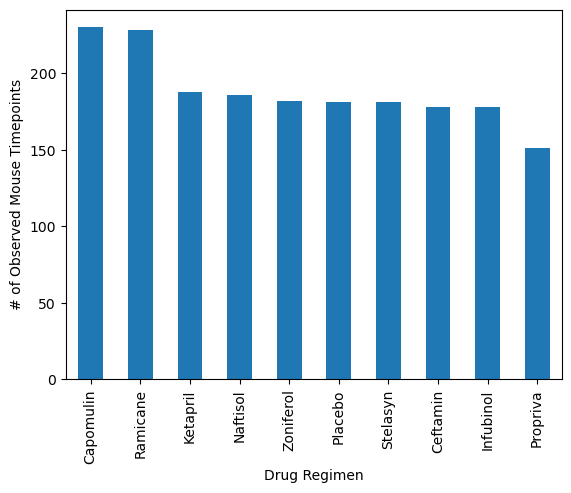

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drugs_timepoints = cleaned_fulldata_df[['Drug Regimen', 'Timepoint']].set_index('Drug Regimen').groupby('Drug Regimen').count().sort_values(by= 'Timepoint', ascending= False)
# print(drugs_timepoints)

drugs_timepoints.plot(kind= 'bar', legend= False, xlabel= 'Drug Regimen', ylabel= '# of Observed Mouse Timepoints')
plt.show()


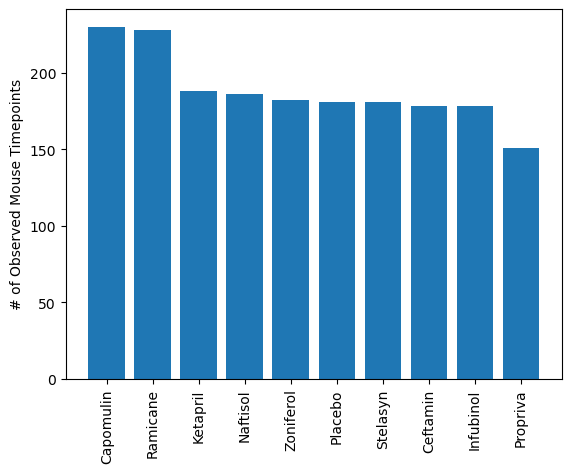

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drugs_timepoints))
tick_locations = [i for i in x_axis]
y_axis = drugs_timepoints['Timepoint']


figure= plt.figure()
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, drugs_timepoints.index, rotation= 'vertical')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


,Mouse ID
Sex,
Male,958
Female,925


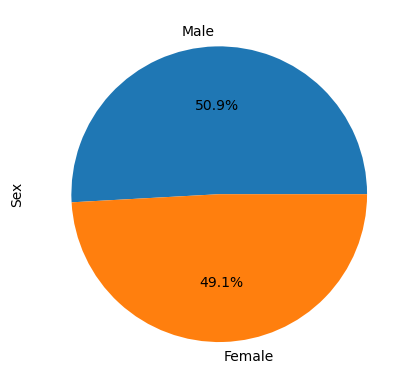

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# print(cleaned_fulldata_df.columns)
mouse_sexes = cleaned_fulldata_df[['Sex', 'Mouse ID']].set_index('Sex').groupby('Sex').count().sort_values(by= 'Mouse ID', ascending= False)
# print(mouse_sexes)

mouse_sexes.plot(kind= 'pie', y= 'Mouse ID', legend= False, ylabel= 'Sex', autopct = '%1.1f%%')
mouse_sexes

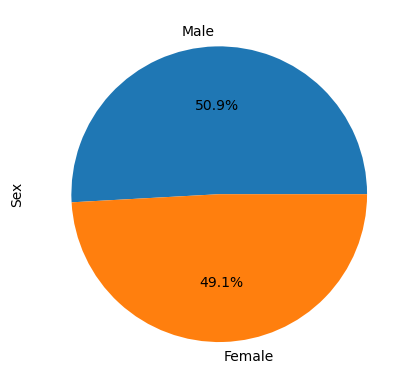

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# print(mouse_sexes)
labels = mouse_sexes.index.to_list()
# print(labels)

values = mouse_sexes['Mouse ID'].to_list()
# print(values)

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_tumors = cleaned_fulldata_df[['Mouse ID', 'Drug Regimen', 'Timepoint']].groupby(['Mouse ID', 'Drug Regimen']).max(['Timepoint']).sort_values(by= 'Mouse ID', ascending= True)

mouse_tumors

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumors_merged_df = pd.merge(cleaned_fulldata_df, mouse_tumors, how= 'right', on= ['Mouse ID', 'Drug Regimen', 'Timepoint'])
tumors_merged_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = cleaned_fulldata_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
    # Source code [0] and 'AskBCS' guidance:

tumors_dict = {}

for drug in drugs_list:
    drug_df = tumors_merged_df.loc[tumors_merged_df['Drug Regimen']== drug, 'Tumor Volume (mm3)']   #.sort_values
#     print(f'{drug} output Tumor volumes: \n')
#     print(drug_df)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    quartiles = drug_df.quantile([.25, .5, .75])
    lowerq = drug_df.quantile(.25)
    upperq = drug_df.quantile(.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
#     outliers = drug_df[(drug_df<lower_bound) | (drug_df>upper_bound)]
    outliers = drug_df.loc[(drug_df < lower_bound) | (drug_df > upper_bound)]
#     outliers_list.append(outliers[0])
    tumors_dict[drug] = {"Drug_DF": drug_df, "lowerq": lowerq, "upperq": upperq, 
                                 "iqr": iqr, "lower_bound": lower_bound, "upper_bound": upper_bound, "outliers": outliers}
    
    print(f'{drug}\'s potential outliers: {outliers}')


# pprint(tumors_dict)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Stelasyn's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<class 'function'>


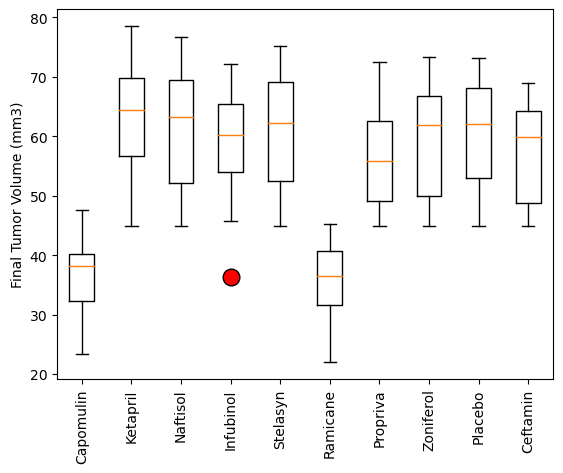

In [88]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
    # Source code [4] https://stackoverflow.com/questions/64383047/how-to-plot-the-boxplot-of-the-columns-in-one-loop
box_df = pd.DataFrame(tumors_dict)
# print(box_df)
# print(box_df.iloc[0])

fig = plt.figure()   # plots figure for each iteration
flierprops= dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')
boxplot = plt.boxplot(box_df.iloc[0], labels=drugs_list, flierprops= flierprops)
plt.xticks(rotation= 90)
plt.ylabel('Final Tumor Volume (mm3)')


print(type(plt.figure))
plt.show()

# -------------------------------------------------------------------------------------
### Ignore these attempted methods:

# I need to figure out how to get the data for this to be the 'Drug_DF' row only.
# data = box_df.iloc[0]
# df = pd.DataFrame(data, columns= )

# df.boxplot(grid= False)
# plt.show()
### Need to figure out how to only plot that first row of data in loop. I dont know...

# for column in box_df:
#     data= box_df[column].values[0]
#     fig = plt.boxplot(data)
#     plt.show()

# -------------------------------------------------------------------------------------


## Line and Scatter Plots

In [102]:
#syntax ref: tumors_merged_df.loc[tumors_merged_df['Drug Regimen']== drug, 'Tumor Volume (mm3)']
single_mouse = cleaned_fulldata_df.loc[cleaned_fulldata_df['Mouse ID'] == 's185']
print(type(single_mouse))
single_mouse.head(2)


<class 'pandas.core.frame.DataFrame'>


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1691,s185,0,45.000000,0,Capomulin,Female,3,17
1692,s185,5,43.878496,0,Capomulin,Female,3,17


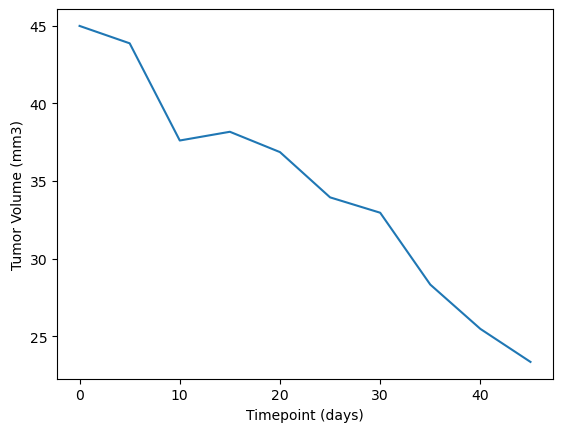

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line = single_mouse.plot.line(x='Timepoint', y= 'Tumor Volume (mm3)', ylabel= 'Tumor Volume (mm3)', 
                              xlabel= 'Timepoint (days)', legend= False)

In [129]:
capomulin_df = cleaned_fulldata_df.loc[cleaned_fulldata_df['Drug Regimen'] == 'Capomulin'].groupby(['Tumor Volume (mm3)'], as_index= False).mean(['Tumor Volume (mm3)'])

print(type(capomulin_df))
capomulin_df

<class 'pandas.core.frame.DataFrame'>


,Tumor Volume (mm3),Timepoint,Metastatic Sites,Age_months,Weight (g)
0,23.343598,45.0,1.0,3.0,17.0
1,25.472143,40.0,1.0,3.0,17.0
2,28.167397,40.0,0.0,16.0,15.0
3,28.328531,35.0,1.0,3.0,17.0
4,28.430964,45.0,1.0,22.0,17.0
...,...,...,...,...,...
201,47.373423,15.0,0.0,12.0,25.0
202,47.488599,15.0,1.0,17.0,21.0
203,47.685963,45.0,1.0,1.0,24.0
204,48.070452,20.0,2.0,17.0,21.0


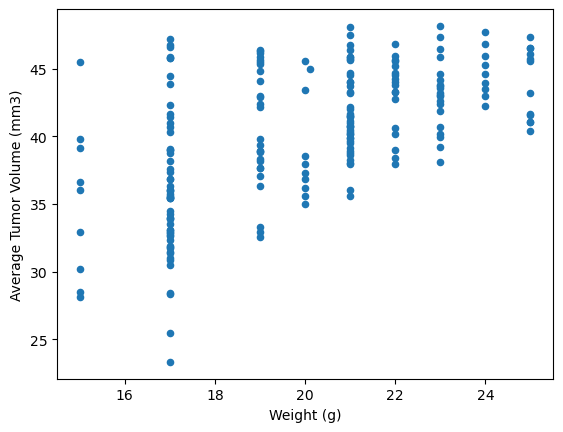

In [130]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter = capomulin_df.plot.scatter(y= 'Tumor Volume (mm3)', x= 'Weight (g)', ylabel= 'Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


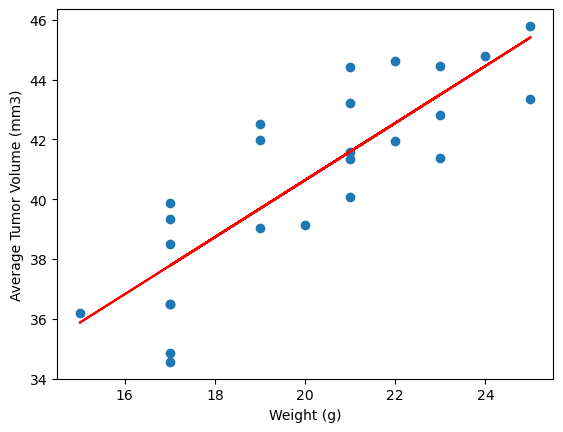

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
